# Logical T state Encoded by Steane


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit.visualization import plot_histogram
import typing


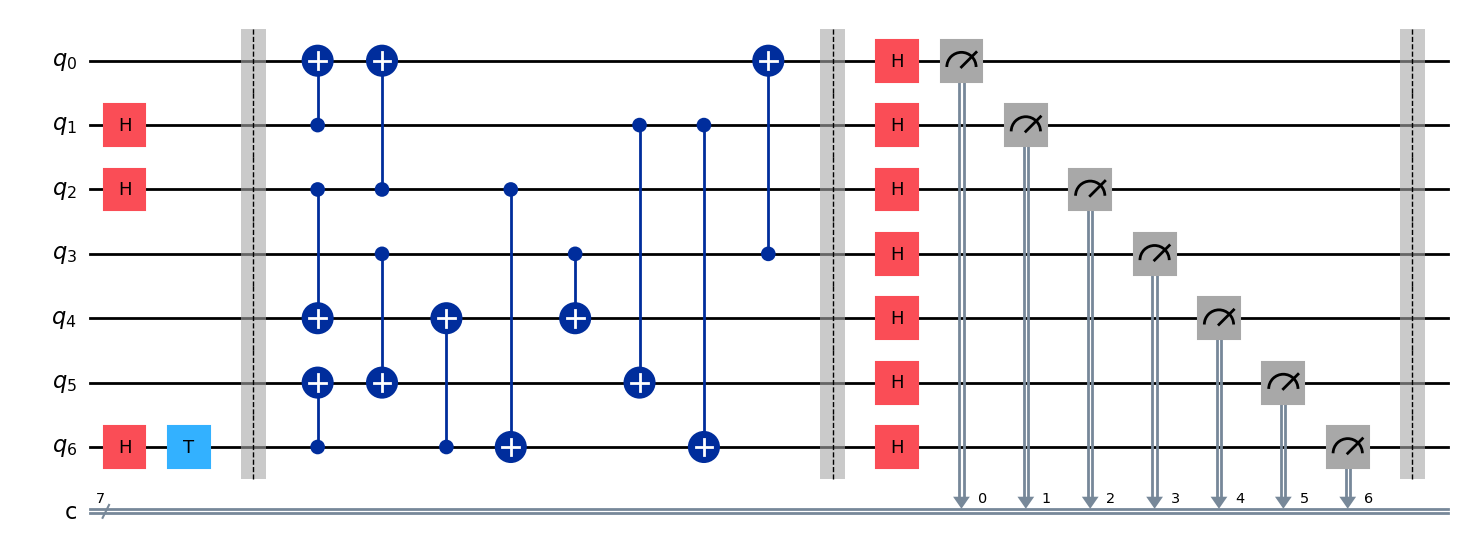

In [140]:

def steane_encoding(qc: QuantumCircuit):
    for i in range(1, 3):
        qc.h(i)

    qc.h(6)
    qc.t(6)
    qc.barrier()

    qc.cx(1, 0)
    qc.cx(2, 4)
    qc.cx(6, 5)

    qc.cx(2,0)
    qc.cx(3,5)

    qc.cx(6,4)
    qc.cx(2,6)

    qc.cx(3,4)

    qc.cx(1,5)
    qc.cx(1,6)

    qc.cx(3 ,0)

    qc.barrier()

    for i in range(0, 7):
        qc.h(i)
        qc.measure(i,i)
    qc.barrier()
            

qc_713 = QuantumCircuit(7,7)
steane_encoding(qc_713)
# for i in range(0, 7):
#         qc_713.measure(i,i)
qc_713.draw('mpl')



# Simulate


In [141]:
backend = AerSimulator(method='statevector')

job = backend.run(qc_713,shots=1000)
result = job.result()
print(result)

Result(backend_name='aer_simulator_statevector', backend_version='0.14.2', qobj_id='', job_id='d4bce966-4150-48ea-9708-6824a8a53f59', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x7': 50, '0x41': 11, '0x63': 61, '0x22': 12, '0x3e': 50, '0x13': 16, '0x6b': 66, '0x5d': 46, '0x5a': 45, '0x46': 13, '0x0': 54, '0x52': 46, '0x2d': 7, '0x8': 47, '0x31': 57, '0x2a': 11, '0x36': 44, '0x6c': 52, '0x39': 54, '0x64': 56, '0xf': 54, '0x55': 56, '0x1c': 6, '0x49': 13, '0x7f': 7, '0x77': 7, '0x70': 10, '0x4e': 13, '0x78': 10, '0x14': 7, '0x1b': 13, '0x25': 6}), header=QobjExperimentHeader(creg_sizes=[['c', 7]], global_phase=0.0, memory_slots=7, n_qubits=7, name='circuit-318', qreg_sizes=[['q', 7]], metadata={}), status=DONE, seed_simulator=308947857, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6], 'device': 'CPU', 'remapped_qubits': Fals

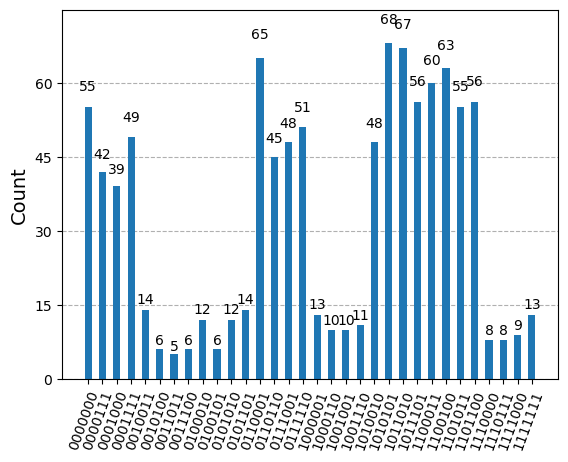

In [142]:
result = AerSimulator().run(qc_713).result()
statistics = result.get_counts()

display(plot_histogram(statistics)) 
# print(result)

# Combining Steane Code and small MSD

In [143]:
qc_3_713 = QuantumCircuit(21,21)

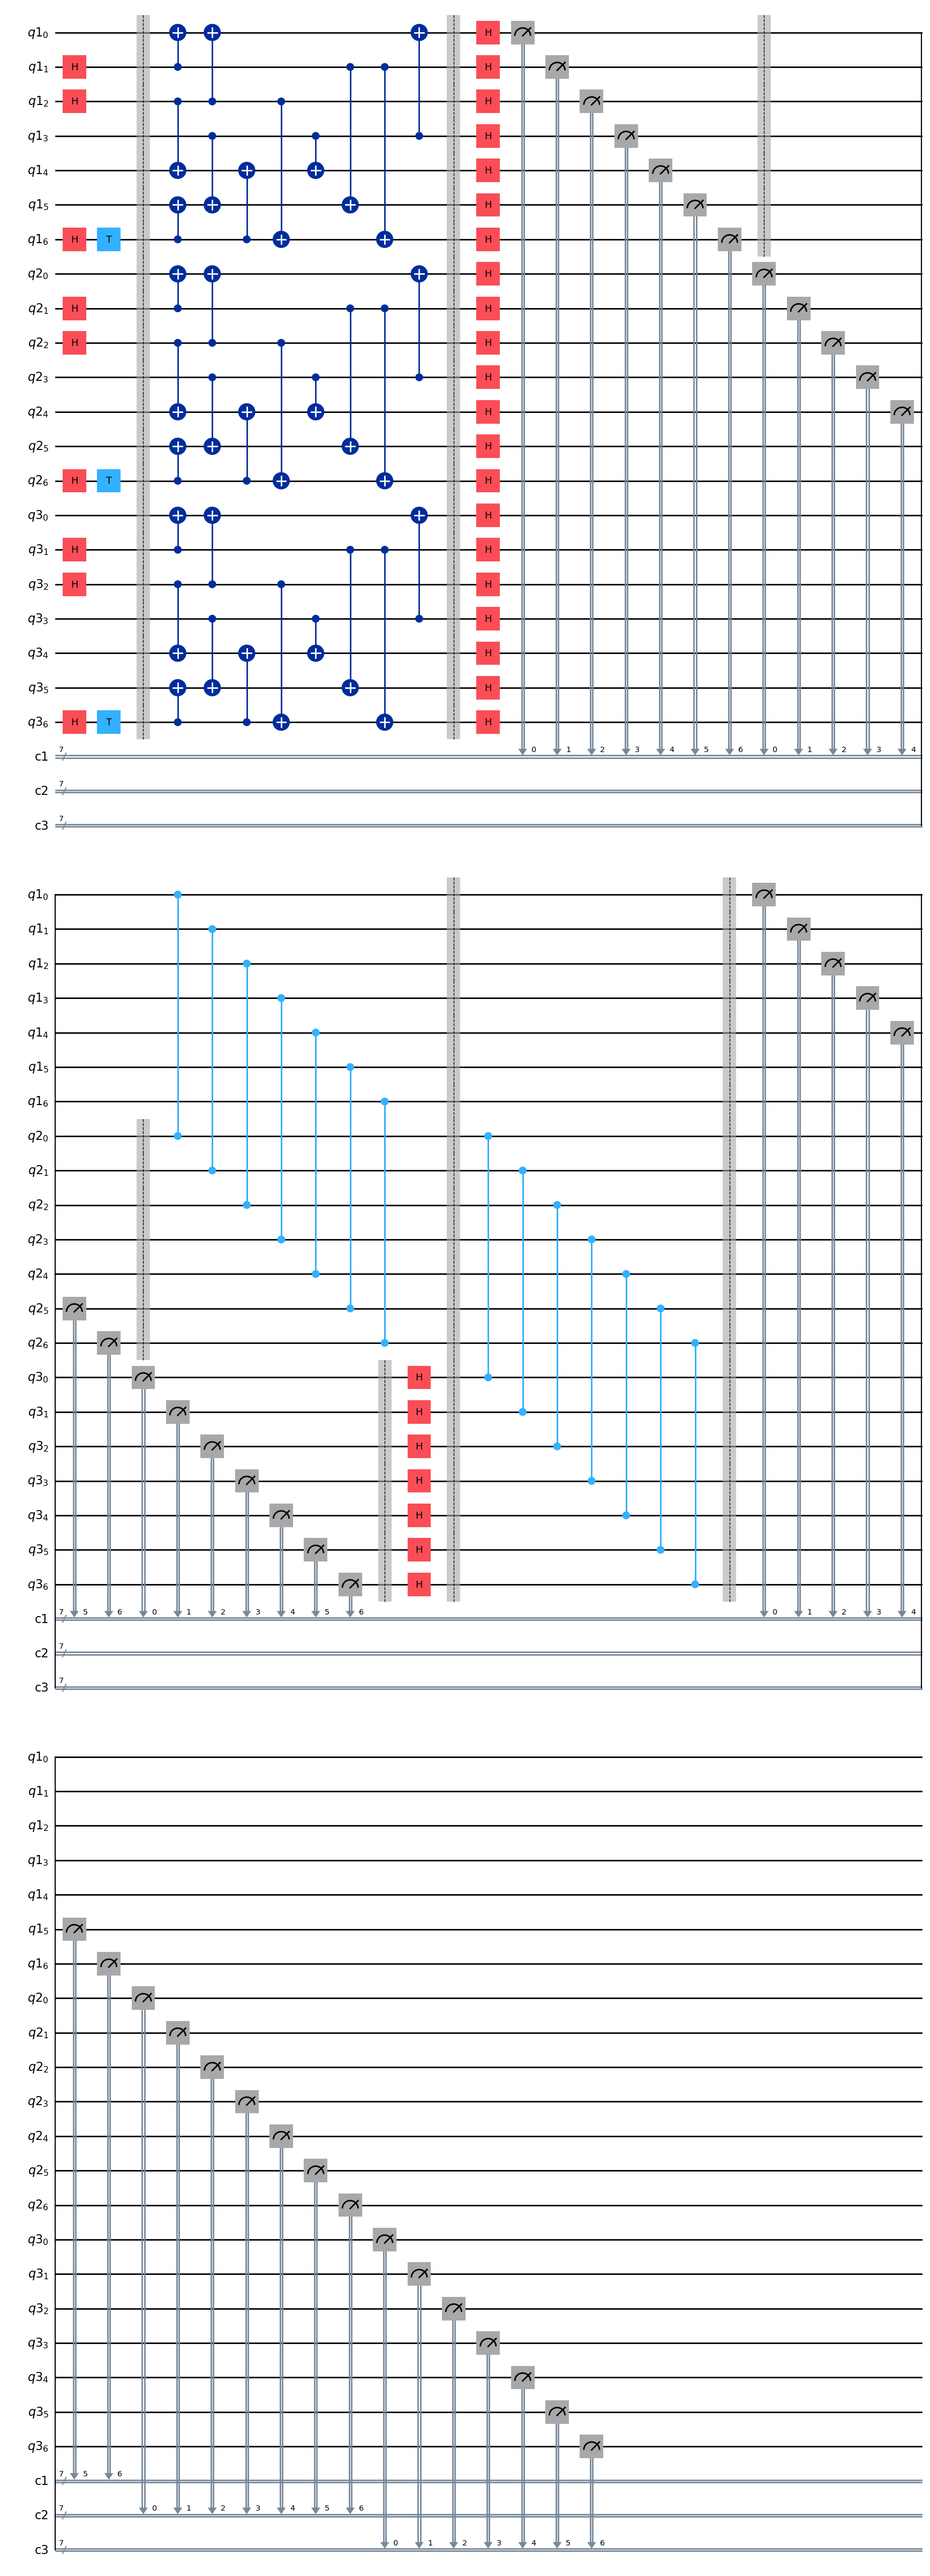

In [145]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create three separate circuits with their own registers
qr_1_713 = QuantumRegister(7, 'q1')
cr_1_713 = ClassicalRegister(7, 'c1')
qc_1_713 = QuantumCircuit(qr_1_713, cr_1_713)
steane_encoding(qc_1_713,)


qr_2_713 = QuantumRegister(7, 'q2')
cr_2_713 = ClassicalRegister(7, 'c2')
qc_2_713 = QuantumCircuit(qr_2_713, cr_2_713)
steane_encoding(qc_2_713)

qr_3_713 = QuantumRegister(7, 'q3')
cr_3_713 = ClassicalRegister(7, 'c3')
qc_3_713 = QuantumCircuit(qr_3_713, cr_3_713)
steane_encoding(qc_3_713)

# Create a new combined circuit with all qubits
combined_qc = QuantumCircuit(qr_1_713, cr_1_713, qr_2_713, cr_2_713, qr_3_713, cr_3_713)

# Compose each circuit into the combined one
combined_qc.compose(qc_1_713, qubits=qr_1_713, inplace=True)
combined_qc.compose(qc_2_713, qubits=qr_2_713, inplace=True)
combined_qc.compose(qc_3_713, qubits=qr_3_713, inplace=True)

# print(combined_qc)
# print("Total number of qubits:", combined_qc.num_qubits)

#combined_qc.draw('mpl')



for i in range(0,7):
    combined_qc.cz(i, i + 7)
    combined_qc.h(i + 14)

combined_qc.barrier()

for i in range(0,7):
    combined_qc.cz(i + 7, i + 14)

combined_qc.barrier()

#combined_qc.draw('mpl')

for i in range(0, 21):
    combined_qc.measure(i,i)

combined_qc.draw('mpl')

#qc_3_713.draw('mpl()')

# for i in range(0, 21):
#         qc_3_713.measure(i,i)
# qc_3_713.draw('mpl')

This appears to be a monstrosity. Let us turn some of these things into blocks


c:\Users\diyan\anaconda3\lib\site-packages\qiskit\circuit\quantumcircuit.py:3263: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


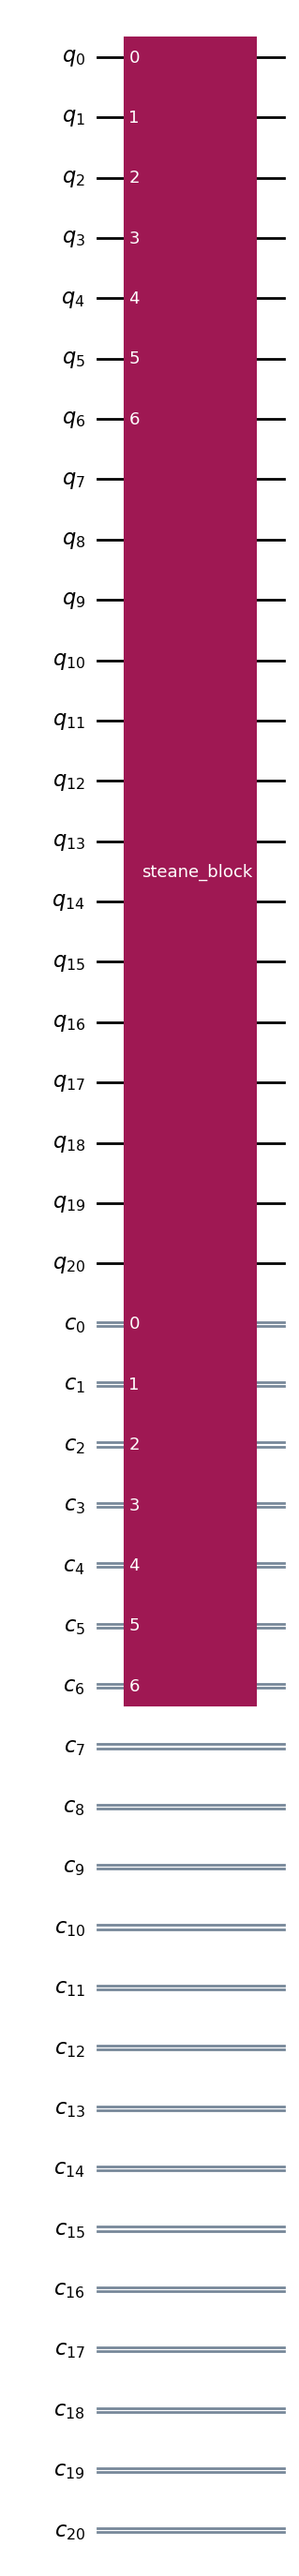

In [ ]:
steane_enc_block = QuantumCircuit(7, 7, name="steane_block")
for i in range(1, 3):
    steane_enc_block.h(i)

steane_enc_block.h(6)
steane_enc_block.t(6)
steane_enc_block.barrier()

steane_enc_block.cx(1, 0)
steane_enc_block.cx(2, 4)
steane_enc_block.cx(6, 5)

steane_enc_block.cx(2,0)
steane_enc_block.cx(3,5)

steane_enc_block.cx(6,4)
steane_enc_block.cx(2,6)

steane_enc_block.cx(3,4)

steane_enc_block.cx(1,5)
steane_enc_block.cx(1,6)

steane_enc_block.cx(3 ,0)

steane_enc_block.barrier()

for i in range(0, 7):
    steane_enc_block.h(i)
    #steane_enc_block.measure(i,i)
steane_enc_block.barrier()

# convert to instruction
steane_block_instr = steane_enc_block.to_instruction()

# Create a main circuit with 4 qubits
qc_3_713 = QuantumCircuit(21,21)

# Use the block on qubits 0 & 1
qc_3_713.append(steane_block_instr, range(0,7), [0,1,2,3,4,5,6])

qc_3_713.draw('mpl')